## Elastic Wave Equation

The elastic wave equation describes the propagation of seismic waves in an elastic medium. It's derived from the combination of Newton's second law of motion and Hooke's law for elastic materials.

### Basic Concepts

Before diving into the equations for each dimension, let's understand a few fundamental terms:

- **Displacement, $ u $**: The measure of how much a point in the medium has moved from its equilibrium or rest position.
- **Density, $ \rho $**: The mass per unit volume of the material.
- **Shear Modulus, $ \mu $**: A measure of the material's resistance to shear deformation.
- **Lamé parameters $ \lambda $**: Related to the material's resistance to volumetric (or hydrostatic) deformation.

### 1D Elastic Wave Equation

In a one-dimensional setting, consider a rod subjected to forces that cause it to stretch or compress. The elastic wave equation can be expressed as:

$$ \rho \frac{\partial^2 u}{\partial t^2} = \mu \frac{\partial^2 u}{\partial x^2} $$

Where:
- $ t $ is time.
- $ x $ is the spatial coordinate.

This equation describes the propagation of a wave along the x-axis.

### 2D Elastic Wave Equation

In 2D and 3D, the stress-strain relationship for isotropic elastic materials is described using the two Lamé parameters $ \lambda $ and $ \mu $, where:

- $ \lambda $ is the first Lamé parameter.
- $ \mu $ is the second Lamé parameter, also known as the shear modulus.

The 2D elastic wave equations in terms of displacements $ u $ and $ v $ (where $ u $ is the displacement in the x-direction and $ v $ is the displacement in the y-direction) and considering the Lamé parameters are:

$$ \rho \frac{\partial^2 u}{\partial t^2} = (\lambda + 2\mu) \frac{\partial^2 u}{\partial x^2} + \lambda \frac{\partial^2 v}{\partial x \partial y} $$

$$ \rho \frac{\partial^2 v}{\partial t^2} = (\lambda + 2\mu) \frac{\partial^2 v}{\partial y^2} + \lambda \frac{\partial^2 u}{\partial x \partial y} $$

These equations consider both the compressional (or P-waves) and shear (or S-waves) characteristics of wave propagation in an elastic medium.

### 3D Elastic Wave Equation

In three dimensions, the elastic wave equation becomes more complex due to the additional degree of freedom. The equation can be represented as:

$$ \rho \frac{\partial^2 u}{\partial t^2} = \mu \nabla^2 u + (\lambda + \mu) \nabla(\nabla \cdot u) $$

Here:
- $ \nabla^2 $ is the Laplacian operator, which represents the sum of the second derivatives with respect to the spatial coordinates.
- $ \lambda $ is the first Lame parameter, related to the bulk modulus and shear modulus of the material.

This 3D equation describes the propagation of waves in a volume and takes into account both the compressional (P-waves) and shear (S-waves) waves that can occur in three-dimensional elastic media.

In all these equations, the left-hand side represents the inertial force of the medium, while the right-hand side represents the elastic restoring force.

## Numerical Discretization

### 1D Elastic Wave Equation

Given the continuous 1D elastic wave equation:
$$ \rho \frac{\partial^2 u}{\partial t^2} = \mu \frac{\partial^2 u}{\partial x^2} $$

The finite difference approximation is:
$$ \rho \frac{u^{n+1}_i - 2u^n_i + u^{n-1}_i}{\Delta t^2} = \mu \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2} $$

Where:
- $ u^n_i $ represents the displacement at spatial point $ i $ and time step $ n $.
- $ \Delta t $ is the temporal step.
- $ \Delta x $ is the spatial step.

In [4]:
using Pkg
Pkg.activate("D:\\OneDrive - UGM 365\\Semester Gasal 2023-2024\\Fisika Komputasi\\elastic-wave")

  Activating new project at `D:\OneDrive - UGM 365\Semester Gasal 2023-2024\Fisika Komputasi\elastic-wave`


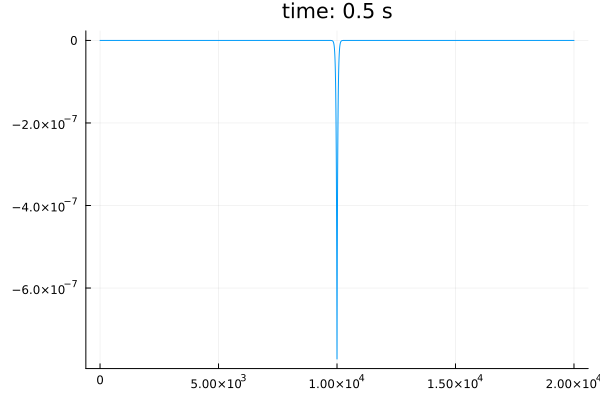

In [2]:
using Plots

# Parameters
nx = 20000     # Number of spatial points in the domain
dx = 1.0       # Spatial step size (in meters)
dt = 0.0005    # Time step size (in seconds)
nt = 1000      # Number of time steps to simulate
ρ = 2.5        # Density of the medium (in kg/m^3)
μ = 2e6        # Shear modulus of the medium (in Pa)
c = sqrt(μ/ρ)  # Speed of wave propagation (in m/s)
f = 1.0        # Central frequency of the source (in Hz)

u = zeros(nx)       # Displacement at current time step
u_prev = zeros(nx)  # Displacement at previous time step
u_next = zeros(nx)  # Displacement at next time step

# Source term (simple Ricker wavelet)
function ricker_wavelet(t, f; tau = 2.0)
    A = (1 - 2 * π^2*f^2*(t-tau)^2)
    wavelet = A * exp(-π^2*f^2*(t-tau)^2)
    return wavelet
end
# source = sin.(2π * (1:nt) / 20)
source_loc = nx ÷ 2

# Time-stepping loop
for it = 1:nt
    for ix = 2:nx-1
        u_next[ix] = 2u[ix] - u_prev[ix] + (c^2 * dt^2 / dx^2) * (u[ix+1] - 2u[ix] + u[ix-1])
    end
    u_next[source_loc] += ricker_wavelet(it*dt,f)
    
    u_prev, u, u_next = u, u_next, u_prev
    
    # Plot at every 10 time steps
    if it % 200 == 0
        IJulia.clear_output(true)
        p = plot(u, legend=false, title="time: $(it*dt) s")
        display(p)
        sleep(0.1)
    end
end

In [2]:
using Plots

# Parameters
nx = 20000     # Number of spatial points in the domain
dx = 1.0       # Spatial step size (in meters)
dt = 0.0005    # Time step size (in seconds)
nt = 10000      # Number of time steps to simulate
ρ = 2.5        # Density of the medium (in kg/m^3)
μ = 2e6        # Shear modulus of the medium (in Pa)
c = sqrt(μ / ρ)  # Speed of wave propagation (in m/s)
f = 1.0        # Central frequency of the source (in Hz)

u = zeros(nx)       # Displacement at current time step
u_prev = zeros(nx)  # Displacement at previous time step
u_next = zeros(nx)  # Displacement at next time step

u_time = zeros(nt, nx) # Displacement at all time steps

# Source term (simple Ricker wavelet)
function ricker_wavelet(t, f; tau=2.0)
    A = (1 - 2 * π^2 * f^2 * (t - tau)^2)
    wavelet = A * exp(-π^2 * f^2 * (t - tau)^2)
    return wavelet
end
# source = sin.(2π * (1:nt) / 20)
source_loc = nx ÷ 2

# Time-stepping loop
for it = 1:nt
    for ix = 2:nx-1
        u_next[ix] = 2u[ix] - u_prev[ix] + (c^2 * dt^2 / dx^2) * (u[ix+1] - 2u[ix] + u[ix-1])
    end
    u_next[source_loc] += ricker_wavelet(it * dt, f)

    u_prev, u, u_next = u, u_next, u_prev

    u_time[it, :] = u

    # Plot at every 10 time steps
    # if it % 200 == 0
    #     IJulia.clear_output(true)
    #     p = plot(u, legend=false, title="time: $(it*dt) s")
    #     display(p)
    #     sleep(0.1)
    # end
end

anim = @animate for it = 1:nt
    plot(u_time[it, :], legend=false, title="time: $(it*dt) s", xlims=(0, nx), ylims=(minimum(u_time), maximum(u_time)))
end

gif(anim, "elastic_wave.gif", fps=50)

[ Info: Saved animation to d:\OneDrive - UGM 365\Semester Gasal 2023-2024\Fisika Komputasi\elastic-wave\source_time_function.gif


Plots.AnimatedGif("d:\\OneDrive - UGM 365\\Semester Gasal 2023-2024\\Fisika Komputasi\\elastic-wave\\source_time_function.gif")
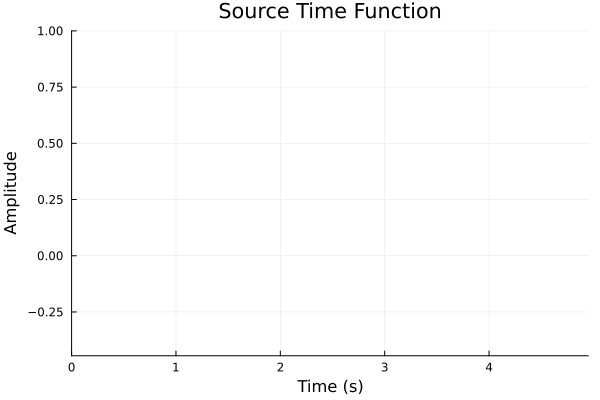

In [9]:
using Plots

# Parameters
nt = 100     # Number of time steps
dt = 0.05    # Time step
f = 1.0      # central frequency of the source

# Time array
t = dt * (0:nt-1)

# Compute source time function
source = ricker_wavelet.(t, f)

# Create animation
anim = @animate for i = 1:nt
    plot(t[1:i], source[1:i], title="Source Time Function", xlabel="Time (s)", ylabel="Amplitude", legend=false, xlims=(0, maximum(t)), ylims=(minimum(source), maximum(source)))
end

# Save animation as a gif
gif(anim, "source_time_function.gif", fps=15)


### Group Assignment

1. Plot the source time function of the previous 1D case, how much is the speed of the wave?
2. Optimize the computation and display on the figure
3. Discritize the wave equation in 2D and implement it in Julia!